 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports

import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
pwd

'C:\\dev\\Bootcamp_Homework\\Week 4\\Instructions\\Starter_Code'

In [3]:
# Reading whale returns

filepath = Path("Resources/")

# whale_returns_df = pd.read_csv(str(filepath)+'/whale_returns.csv',index_col="Date"))

whale_returns_df = pd.read_csv(str(filepath)+'/whale_returns.csv', index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns_df = whale_returns_df.sort_index()
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-01-04,0.000919,0.000157,-0.002002,-0.003865
2015-01-05,0.006051,0.002551,0.006526,0.009650
2015-01-06,0.002081,-0.000113,0.000837,0.002916
2015-01-07,-0.001365,0.002100,0.005815,-0.001304
2015-01-09,-0.018980,-0.012439,-0.022997,-0.037577


In [4]:
# Set the date as the index to the DataFrame
# whale_returns_df = whale_returns_df.set_index(pd.to_datetime(whale_returns_df["Date"], infer_datetime_format=True))
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-01-04,0.000919,0.000157,-0.002002,-0.003865
2015-01-05,0.006051,0.002551,0.006526,0.009650
2015-01-06,0.002081,-0.000113,0.000837,0.002916
2015-01-07,-0.001365,0.002100,0.005815,-0.001304
2015-01-09,-0.018980,-0.012439,-0.022997,-0.037577


In [5]:
# Drop extra date column 

# whale_returns_df = whale_returns_df.drop(columns=["Date"])
# whale_returns_df.head()

In [6]:
# Identify Series count
whale_returns_df.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [7]:
# Count nulls

whale_returns_df.isnull().sum() 

# Note - opened the file in MS Excel and checked for blanks -> 1 blank for all columns except Date -> confirming code output below is correct

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [8]:
# Check for null values

whale_returns_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-01-04,False,False,False,False
2015-01-05,False,False,False,False
2015-01-06,False,False,False,False
2015-01-07,False,False,False,False
2015-01-09,False,False,False,False
...,...,...,...,...
2019-11-03,False,False,False,False
2019-11-04,False,False,False,False
2019-12-02,False,False,False,False


In [9]:
# Drop nulls

whale_returns_df = whale_returns_df.dropna().copy()
whale_returns_df

whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [10]:
# Reading algorithmic returns

# algo_returns_df= pd.read_csv(str(filepath)+'/ algo_returns.csv',index_col="Date"))

algo_returns_df= pd.read_csv(str(filepath)+'/algo_returns.csv', index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns_df = algo_returns_df.sort_index()
algo_returns_df.head(10)

# Note: consolidated some following steps into the code above

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [11]:
# # Set the date as the index to the DataFrame

# algo_returns_df = algo_returns_df.set_index(pd.to_datetime(algo_returns_df["Date"], infer_datetime_format=True))
# algo_returns_df.head()

# This step added back to the beginning import

In [12]:
# # Drop extra date column 

# algo_returns_df = algo_returns_df.drop(columns=["Date"])
# algo_returns_df.head()

In [13]:
# Count nulls

algo_returns_df.isnull()
algo_returns_df.isnull().sum() 

# Note - opened the file in MS Excel and checked for blanks -> 6 blanks for Algo 2 column -> confirming code output below is correct

Algo 1    0
Algo 2    6
dtype: int64

In [14]:
# Drop nulls

algo_returns_df = algo_returns_df.dropna().copy()
algo_returns_df

algo_returns_df.isnull().sum()
algo_returns_df.head(10)

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
2014-06-12,-0.000028,-0.003841
2014-06-13,0.001917,-0.000814
2014-06-16,0.001084,0.001831
2014-06-17,0.000922,0.006870


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [15]:
# Reading S&P TSX 60 Closing Prices

sp_tax_df = pd.read_csv(str(filepath)+'/sp_tsx_history.csv', index_col="Date", parse_dates=True, infer_datetime_format=True)
sp_tax_df = sp_tax_df.sort_index()
sp_tax_df.head(10)

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
2012-10-09,"$12,273.57"
2012-10-10,"$12,212.42"
2012-10-11,"$12,233.95"
2012-10-12,"$12,202.04"


In [16]:
# # Set the date as the index to the DataFrame

# sp_tax_df = sp_tax_df.set_index(pd.to_datetime(sp_tax_df["Date"], infer_datetime_format=True))
# sp_tax_df.head()

In [17]:
# # Drop extra date column 

# sp_tax_df = sp_tax_df.drop(columns=["Date"])
# sp_tax_df.head()

In [18]:
# Identify Series count

sp_tax_df.count()

Close    1818
dtype: int64

In [19]:
# Check Data Types

sp_tax_df.dtypes

Close    object
dtype: object

In [20]:
# Fix Data Types

# Remove "$" signs from "Close" column

sp_tax_df["Close"] = sp_tax_df["Close"].str.replace("$", "")
sp_tax_df["Close"]

# Remove "," from "Close" column

sp_tax_df["Close"] = sp_tax_df["Close"].str.replace(",", "")
sp_tax_df["Close"]

# Check output

sp_tax_df.head()

C:\Users\peter\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  """


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [21]:
# Convert "Close" column type from string to float

sp_tax_df["Close"] = sp_tax_df["Close"].astype("float")

# Recheck data types

sp_tax_df.dtypes

Close    float64
dtype: object

In [22]:
# Check output

sp_tax_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [23]:
# Calculate Daily Returns

# Calculate the daily return using the 'shift()' function METHOD 1

daily_returns = (sp_tax_df - sp_tax_df.shift(1)) / sp_tax_df.shift(1)
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [24]:
# Calculate the daily return using the 'pct_change()' function METHOD 2

daily_returns = sp_tax_df.pct_change()
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [25]:
# Drop nulls

daily_returns = daily_returns.dropna().copy()
daily_returns

display(daily_returns.isnull().sum())
daily_returns.head(10)

Close    0
dtype: int64

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
2012-10-10,-0.004982
2012-10-11,0.001763
2012-10-12,-0.002608
2012-10-15,0.002288


In [26]:
# Rename `Close` Column to be specific to this portfolio.

daily_returns.rename(columns={"Close":"S&P TSX 60 Daily Returns"}, inplace=True)
daily_returns

,S&P TSX 60 Daily Returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [27]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.

joined_data_cols = pd.concat(
    [whale_returns_df, algo_returns_df, daily_returns], axis="columns", join="inner"
)
joined_data_cols.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Daily Returns
Date,,,,,,,
2015-01-05,0.006051,0.002551,0.006526,0.009650,0.013712,-0.015621,-0.024465
2015-01-06,0.002081,-0.000113,0.000837,0.002916,0.002307,-0.011984,-0.010139
2015-01-07,-0.001365,0.002100,0.005815,-0.001304,0.003473,0.009418,0.002683
2015-01-09,-0.018980,-0.012439,-0.022997,-0.037577,-0.009436,-0.001881,-0.005035
2015-01-12,0.004271,0.010081,0.009055,0.010649,-0.019423,-0.002282,-0.008336


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns of All Portfolios'}, xlabel='Date'>

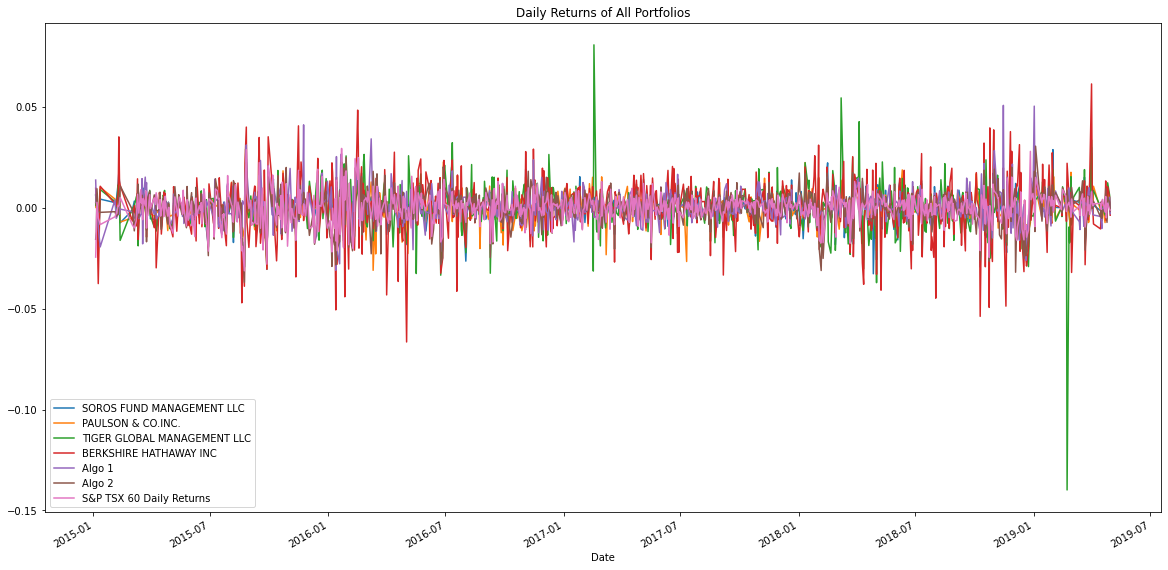

In [28]:
# Plot daily returns of all portfolios

joined_data_cols.plot(figsize=(20,10), title="Daily Returns of All Portfolios") # in an extra big graph coz there is a lot of stuff to plot!

#### Calculate and Plot cumulative returns.

In [29]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + joined_data_cols).cumprod()
cumulative_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Daily Returns
Date,,,,,,,
2015-01-05,1.006051,1.002551,1.006526,1.009650,1.013712,0.984379,0.975535
2015-01-06,1.008145,1.002438,1.007368,1.012594,1.016050,0.972582,0.965644
2015-01-07,1.006769,1.004543,1.013226,1.011273,1.019579,0.981742,0.968235
2015-01-09,0.987661,0.992048,0.989925,0.973273,1.009958,0.979895,0.963360
2015-01-12,0.991880,1.002048,0.998889,0.983637,0.990341,0.977659,0.955329


<AxesSubplot:xlabel='Date'>

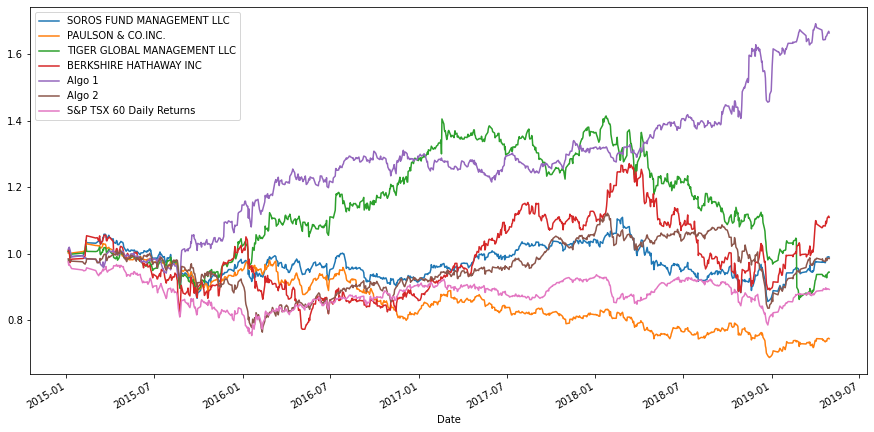

In [30]:
# Plot cumulative returns

cumulative_returns.plot(figsize=(15,7.5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Box Plot Risk Analysis by Portfolio'}>

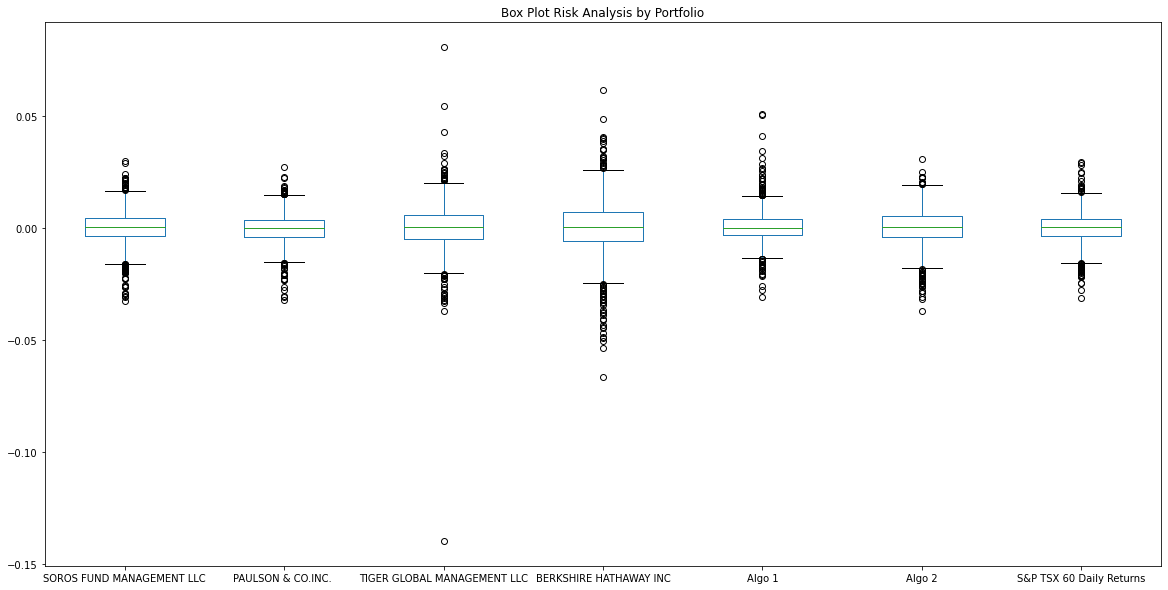

In [31]:
# Box plot to visually show risk

joined_data_cols.plot.box(figsize=(20,10), title="Box Plot Risk Analysis by Portfolio")

### Calculate Standard Deviations

In [32]:
# Calculate the daily standard deviations of all portfolios

daily_std = joined_data_cols.std()
daily_std.head(10)

SOROS FUND MANAGEMENT LLC      0.007950
PAULSON & CO.INC.              0.006975
TIGER GLOBAL MANAGEMENT LLC    0.011085
BERKSHIRE HATHAWAY INC         0.013021
Algo 1                         0.007606
Algo 2                         0.008370
S&P TSX 60 Daily Returns       0.007119
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [33]:
# Calculate the daily standard deviation of S&P TSX 60

tsx_daily_std = joined_data_cols["S&P TSX 60 Daily Returns"].std()
tsx_daily_std

0.007118941789535902

In [34]:
daily_std > tsx_daily_std

SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                          True
Algo 2                          True
S&P TSX 60 Daily Returns       False
dtype: bool

In [35]:
# Determine which portfolios are riskier than the S&P TSX 60

daily_std = daily_std.sort_values(ascending=False)
daily_std.head(8)

# The higher the standard deviation, the riskier the investment: https://www.investopedia.com/ask/answers/021915/how-standard-deviation-used-determine-risk.asp
# Therefore of the listed portfolios, Berkshire Hathaway is the riskiest and Paulson & Co. Inc the least riskiest of those listed (but does not indicate a better return)

BERKSHIRE HATHAWAY INC         0.013021
TIGER GLOBAL MANAGEMENT LLC    0.011085
Algo 2                         0.008370
SOROS FUND MANAGEMENT LLC      0.007950
Algo 1                         0.007606
S&P TSX 60 Daily Returns       0.007119
PAULSON & CO.INC.              0.006975
dtype: float64

### Calculate the Annualized Standard Deviation

In [36]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = daily_std * np.sqrt(252)
annualized_std.head(8)

BERKSHIRE HATHAWAY INC         0.206704
TIGER GLOBAL MANAGEMENT LLC    0.175974
Algo 2                         0.132877
SOROS FUND MANAGEMENT LLC      0.126197
Algo 1                         0.120744
S&P TSX 60 Daily Returns       0.113010
PAULSON & CO.INC.              0.110728
dtype: float64

<AxesSubplot:title={'center':'Standard Deviation of Portfolios'}, ylabel='Frequency'>

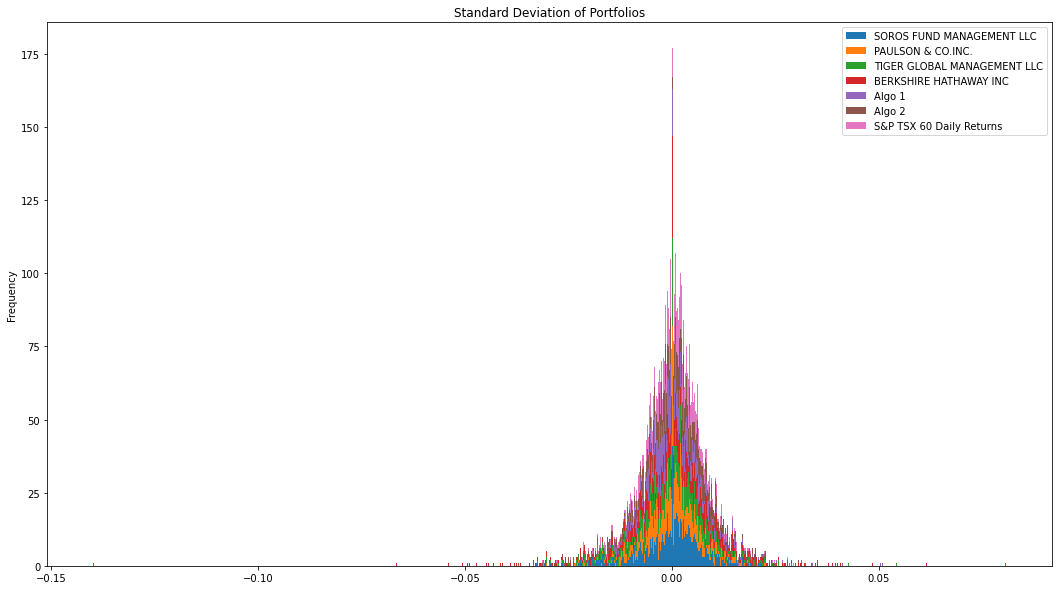

In [37]:
# Histogram plot of the risk analysis across all Portfolios to get a visual feel for the riskier versus safer 
# portfolios on the face of which it looks like Soros, Tiger and Paulson are less risky than Berkshire, Algo 1   
# & Algo 2 which reflects the graph of the cumulative returns above

joined_data_cols.plot.hist(stacked=True, bins=1000, figsize=(18,10), title="Standard Deviation of Portfolios")

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation of Portfolios (21 day window)'}, xlabel='Date'>

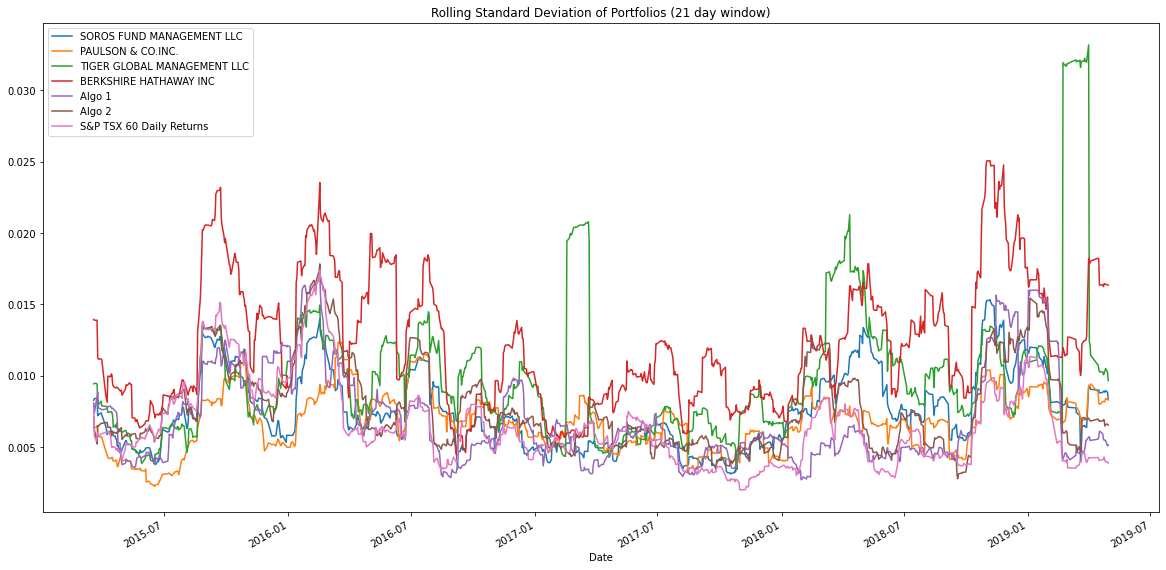

In [38]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation

joined_data_cols.rolling(window=21).std().plot(figsize=(20,10), title="Rolling Standard Deviation of Portfolios (21 day window)")

### Calculate and plot the correlation

Text(0.5, 1.0, 'Seaborn Heatmap of Portfolios correlation')

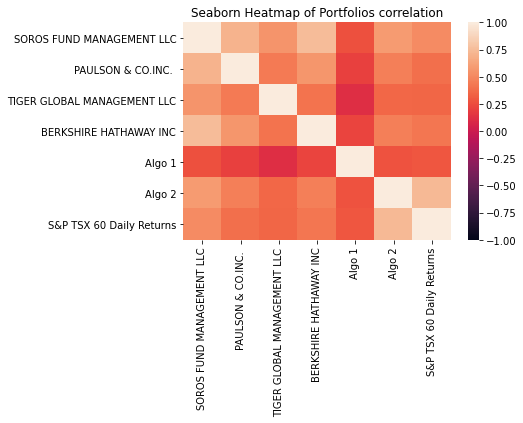

In [39]:
# Calculate the correlation

correlation = joined_data_cols.corr()
correlation

# Display de correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt
ax = plt.axes()
sns.heatmap(correlation, vmin=-1, vmax=1, ax = ax)
ax.set_title('Seaborn Heatmap of Portfolios correlation')

# add a title="Seaborn Heatmap of Portfolios correlation" https://stackoverflow.com/questions/32723798/how-do-i-add-a-title-to-seaborn-heatmap

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [40]:
# Calculate covariance of a single portfolio -> Assume we pick any portfolio, Algo 1 fund
# variance = joined_data_cols['Algo 1'].var()
# variance

In [41]:
# Calculate variance of S&P TSX 60 portfolio

variance = joined_data_cols['S&P TSX 60 Daily Returns'].var()
variance

5.0679332202800635e-05

In [42]:
# Calc covariance of my chosen portfolio to the S&P TSX 60

covariance = joined_data_cols['Algo 1'].cov(joined_data_cols['S&P TSX 60 Daily Returns'])
covariance

1.5959485333773757e-05

In [43]:
# Computing beta

beta = covariance / variance
beta

# Displays the value of the beta

0.31491112136027327

<AxesSubplot:title={'center':'Rolling 60-Day Covariance of Algo 1 Returns vs. S&P TSX 60 Returns'}, xlabel='Date'>

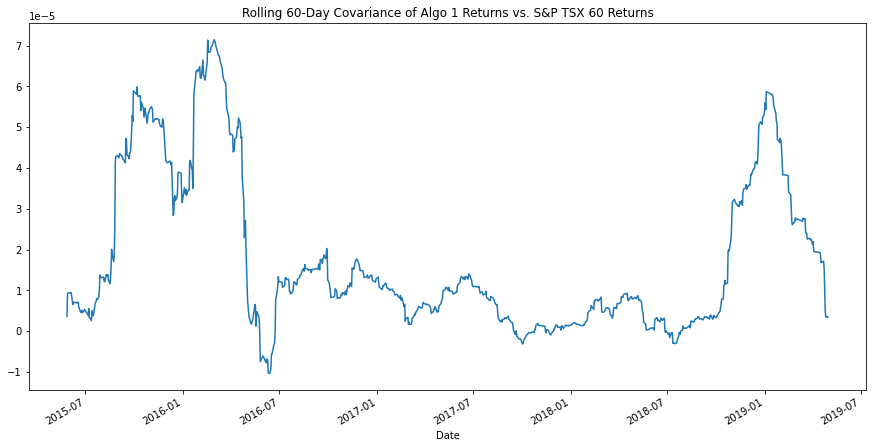

In [44]:
# Plot beta trend
# -> Calculate 60-day rolling covariance of Algo 1 vs.S&P TSX 60 Index and plot the data

rolling_covariance = joined_data_cols['Algo 1'].rolling(window=60).cov(joined_data_cols['S&P TSX 60 Daily Returns'])
rolling_covariance.plot(figsize=(15, 7.5), title='Rolling 60-Day Covariance of Algo 1 Returns vs. S&P TSX 60 Returns')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:title={'center':'Rolling 21-Day Exponential Moving Average for Algo 1 Portfolio'}, xlabel='Date'>

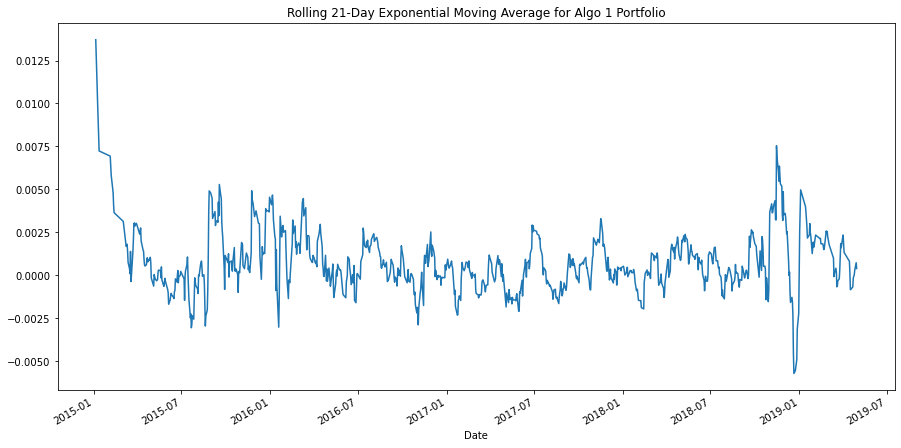

In [45]:
# Use `ewm` to calculate the rolling window

EWM = joined_data_cols['Algo 1'].ewm(span=21, adjust=False).mean()
EWM.plot(figsize=(15, 7.5), title='Rolling 21-Day Exponential Moving Average for Algo 1 Portfolio')

# Couldn't find lectures notes -> https://www.statology.org/exponential-moving-average-pandas/ example as my base

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [46]:
# Annualized Sharpe Ratios

sharpe_ratios = ((joined_data_cols.mean()-joined_data_cols['S&P TSX 60 Daily Returns'].mean()) * 252) / (joined_data_cols.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.241171
PAULSON & CO.INC.             -0.461782
TIGER GLOBAL MANAGEMENT LLC    0.142790
BERKSHIRE HATHAWAY INC         0.366375
Algo 1                         1.449916
Algo 2                         0.226641
S&P TSX 60 Daily Returns       0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

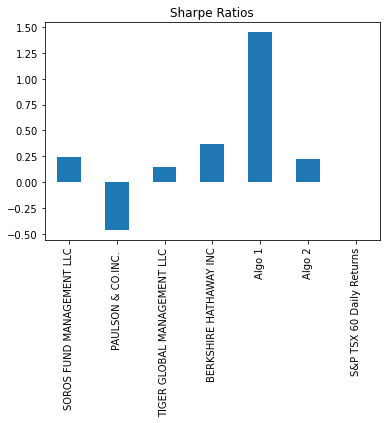

In [47]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

## Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios. Does any portfolio outperform the S&P TSX 60? 

### Reviewing the cumulative returns

Compared to the S&P TSX 60 Daily returns both Algo 1 and Algo 2 have historically returned a better results. Algo 1 appears to have greatly outperformed both the market and the whale portfolios while Algo 2 has tracked the general group of portfolios. Of the whale portfolios, Berkshire Hathaway has consistently returned a higher return on funds with the exception of the Tiger Global portfolio which had great returns from 2015 to 2018 but has appeared to have declined in 2019. The only portfolio that has not outperformed the S&P TSX 60 over the analsyis period is Paulson & Co.

## Determine which portfolios are riskier than the S&P TSX 60

A review of the box plot indicates a greater variablity in risk for the Tiger Global, Berkshire and possibly Algo 1 portfolios compared to the S&P TSX 60, with a number of distinct outliers indicating a wider range of risk. Calculating the standard deviation, only Paulson & Co returned a risk profile lower than the "risk free" S&P TSX 60, which appears to be reflected in Paulson's lower returns. Berkshire Hathaway returned a standard deviation of 0.013021 almost double that of Paulson at 0.006975, matching their corresponding return. Tiger Global and Algo 1 had the next highest standard deviations in the portfoilo mix, indicating higher risk but rewarded with the highest historical return. Annualised standard deviations, or volatility, shows that only Soros and Algos 1 & 2 track a positive close range of volatility to the S&P, while Tiger and Berkshire carry a much higher level of volatility which also provides more chances to make a few big gains. 

Source: The Uses And Limits of Volatility (https://www.investopedia.com/articles/04/021804.asp), https://en.wikipedia.org/wiki/Box_plot, Cutting Through Market Noise With Boxplots (https://www.investing.com/analysis/cutting-through-market-noise-with-boxplots-190669), 

## Determine which portfolios may mimick the S&P TSX 60.

Of the rolling standard deviations (21-day window), Paulson & Co. Algos 1 & 2 appear to follow the S&P TSX 60 over the analsysed period, while Tiger Global and Berkshire indicate the highest volatility compared to the S&P TSX 60 and the overall portfolio group. The Seaborn heatmap indicates the strongest correlation appears to be between the Algo 1 portfolio and all other portfolios including the S&P TSX 60. Further deliving into the Algo 1 portfolio, a 60 day rolling covariance shows the portfolio following the S&P portfolio through mid 2016 to end of 2018 with two large positive devations through the 2105 to mid 2016 and and 2019 range, where the returns are materially higher. Beta (Β) is a measure of the volatility, or systematic risk, of a security or a portfolio in comparison to the market as a whole. Beta is used in the capital asset pricing model (CAPM), which calculates the expected return of an asset based on its beta and expected market returns. Beta data about an individual stock can only provide an investor with an approximation of how much risk the stock will add to a (presumably) diversified portfolio. For beta to be meaningful, the stock should be related to the benchmark that is used in the calculation. nN this instance, the Beta of Algo 1 at 0.315 indicates the portfolio is theoretically less volatile than the S&P TSX, which possibly can be explained by the long period of low volatility outlined in the 60 day rolling covariance chart.

What Statistical Concepts are Important in Portfolio Management? (https://www.hvst.com/posts/what-statistical-concepts-are-important-in-portfolio-management-w6nTOexd), Beta (Types of beta values) (https://www.investopedia.com/terms/b/beta.asp)

Sharpe ratios calculate a risk adjusted return, measuring the performance of an investment (e.g., a security or portfolio) compared to a risk-free asset (in this case the S&P TSX 60 Daily Returns). The Sharpe ratio can also help explain whether a portfolio's excess returns are due to smart investment decisions or a result of too much risk. Although one portfolio or fund can enjoy higher returns than its peers, it is only a good investment if those higher returns do not come with an excess of additional risk, that is, too much risk. Assuming a portfolio or fund can enjoy higher returns than its peers, it is only a good investment if those higher returns do not come with an excess of additional risk, and in this instance Algo 1 has a high return but with a comparatively much higher Sharpe ratio or risk range than the Berkshire or Tiger Global portfolios, diminishing it attractiveness. 

Using standard deviations and variances to measure volatility is used by investors to estimate future fluctuations (volatility) of a portfolio's return based on certain predictive factors, and is the investors' forecast of a likely movement in a portfolio. The weakness of this approach is that all returns earn the same weight. Yesterday's (very recent) return has no more influence on the variance than last month's return. This problem is fixed by using the exponentially weighted moving average (EWMA), in which more recent returns have greater weight on the variance. What's the difference in daily volatility between the variance and EWMA in Algo 1's case? The simple variance gave us a daily volatility of 5.06 but the EWMA gave a daily volatility of only 2.5, therefore there is a material difference as Algo' 1's volatility appears to have trended down compared to the simple variance.

Sharpe Ratio (https://www.investopedia.com/terms/s/sharperatio.asp), What Is a Good Sharpe Ratio? (https://www.investopedia.com/ask/answers/010815/what-good-sharpe-ratio.asp), Exploring the Exponentially Weighted Moving Average (https://www.investopedia.com/articles/07/ewma.asp), Implied Volatility (IV) (https://www.investopedia.com/terms/i/iv.asp)


## ------------

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

#### ---
#### ---      PLEASE NOTE: HOMEWORK README FILE OUTLINES DATA SOURCING TASKS (SEE BELOW) BUT HOMEWORK STARTER CODE PROVIDES DIFFERENT DATA (SHOP, OTEX, L) WHICH I WILL USE INSTEAD
#### ---      1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the built-in Google Finance function to choose 3-5 stocks for your portfolio.
#### ---      2. Download the data as CSV files and calculate the portfolio returns.
#### ---      


For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [48]:
# Reading data from 1st stock
# shop_df = pd.read_csv(str(filepath)+'/shop_historical.csv')

shop_df = Path(str(filepath)+'/shop_historical.csv')
shop_df = pd.read_csv(shop_df, index_col="Date", infer_datetime_format=True, parse_dates=True)
shop_df.head()

# shop_df = Path("../Resources/tsla_historical.csv")
# shop_df = pd.read_csv(tsla_data, index_col="date", infer_datetime_format=True, parse_dates=True)

,Symbol,Close
Date,,
2018-01-02,SHOP,132.06
2018-01-03,SHOP,135.15
2018-01-04,SHOP,137.46
2018-01-05,SHOP,137.26
2018-01-08,SHOP,139.51


In [49]:
# Reading data from 2nd stock
# otex_df = pd.read_csv(str(filepath)+'/otex_historical.csv')

otex_df = Path(str(filepath)+'/otex_historical.csv')
otex_df = pd.read_csv(otex_df, index_col="Date", infer_datetime_format=True, parse_dates=True)
otex_df.head()

,Symbol,Close
Date,,
2018-01-02,OTEX,43.58
2018-01-03,OTEX,43.07
2018-01-04,OTEX,42.91
2018-01-05,OTEX,42.57
2018-01-08,OTEX,42.16


In [50]:
# Reading data from 3rd stock
# lob_df = pd.read_csv(str(filepath)+'/l_historical.csv')

lob_df = Path(str(filepath)+'/l_historical.csv')
lob_df = pd.read_csv(lob_df, index_col="Date", infer_datetime_format=True, parse_dates=True)
lob_df.head()

,Symbol,Close
Date,,
2018-01-02,L,57.99
2018-01-03,L,57.41
2018-01-04,L,57.42
2018-01-05,L,57.42
2018-01-08,L,56.86


In [51]:
# Combine all stocks in a single DataFrame

combo_cols = pd.concat(
    [shop_df, otex_df, lob_df], axis="columns", join="inner"
)
combo_cols.head()

,Symbol,Close,Symbol,Close,Symbol,Close
Date,,,,,,
2018-01-02,SHOP,132.06,OTEX,43.58,L,57.99
2018-01-03,SHOP,135.15,OTEX,43.07,L,57.41
2018-01-04,SHOP,137.46,OTEX,42.91,L,57.42
2018-01-05,SHOP,137.26,OTEX,42.57,L,57.42
2018-01-08,SHOP,139.51,OTEX,42.16,L,56.86


In [52]:
# Reset Date index


In [53]:
# Reorganize portfolio data by having a column per symbol

columns = ["Symbol","SHOP","Symbol","OTEX","Symbol","L"]
combo_cols.columns = columns
combo_cols = combo_cols.drop(columns=["Symbol"])
combo_cols

,SHOP,OTEX,L
Date,,,
2018-01-02,132.06,43.58,57.99
2018-01-03,135.15,43.07,57.41
2018-01-04,137.46,42.91,57.42
2018-01-05,137.26,42.57,57.42
2018-01-08,139.51,42.16,56.86
...,...,...,...
2019-12-20,513.22,58.68,67.90
2019-12-23,511.62,57.89,67.68
2019-12-24,525.39,57.44,67.67


In [54]:
# Calculate daily returns

# Calculate the daily return using the 'shift()' function METHOD 1
# combo_daily_returns = (combo_cols - combo_cols.shift(1)) / combo_cols.shift(1)

# Calculate the daily return using the 'percent()' function METHOD 2

combo_daily_returns = combo_cols.pct_change()
combo_daily_returns.head()

,SHOP,OTEX,L
Date,,,
2018-01-02,NaN,NaN,NaN
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753


In [55]:
# Drop NAs

combo_daily_returns = combo_daily_returns.dropna().copy()
combo_daily_returns.isnull().sum()
combo_daily_returns.head()

,SHOP,OTEX,L
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969


In [56]:
combo_daily_returns.count()

SHOP    500
OTEX    500
L       500
dtype: int64

In [57]:
# Display sample data
combo_daily_returns.head()

,SHOP,OTEX,L
Date,,,
2018-01-03,0.023398,-0.011703,-0.010002
2018-01-04,0.017092,-0.003715,0.000174
2018-01-05,-0.001455,-0.007924,0.000000
2018-01-08,0.016392,-0.009631,-0.009753
2018-01-09,-0.011254,-0.000712,0.008969


In [58]:
combo_daily_returns.count()

SHOP    500
OTEX    500
L       500
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [59]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

shop_weight = 0.33
otex_weight = 0.33
lob_weight = 0.33

portfolio_returns = shop_weight * combo_daily_returns["SHOP"] + otex_weight * combo_daily_returns["OTEX"] + lob_weight * combo_daily_returns["L"]

# Display sample data
portfolio_returns.head()


Date
2018-01-03    0.000559
2018-01-04    0.004472
2018-01-05   -0.003095
2018-01-08   -0.000987
2018-01-09   -0.000989
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [60]:
# Join your returns DataFrame to the original returns DataFrame

weighted_combo_cols = pd.concat(
    [combo_daily_returns, portfolio_returns], axis="columns", join="inner"
)
weighted_combo_cols.head()

columns = ["SHOP","OTEX","L", "Combined return"]
weighted_combo_cols.columns = columns
weighted_combo_cols

,SHOP,OTEX,L,Combined return
Date,,,,
2018-01-03,0.023398,-0.011703,-0.010002,0.000559
2018-01-04,0.017092,-0.003715,0.000174,0.004472
2018-01-05,-0.001455,-0.007924,0.000000,-0.003095
2018-01-08,0.016392,-0.009631,-0.009753,-0.000987
2018-01-09,-0.011254,-0.000712,0.008969,-0.000989
...,...,...,...,...
2019-12-20,-0.005503,0.024441,0.003547,0.007420
2019-12-23,-0.003118,-0.013463,-0.003240,-0.006541
2019-12-24,0.026915,-0.007773,-0.000148,0.006268


In [61]:
# Only compare dates where return data exists for all the stocks (drop NaNs)

weighted_combo_cols.isnull()
weighted_combo_cols.isnull().sum()

SHOP               0
OTEX               0
L                  0
Combined return    0
dtype: int64

In [62]:
# weighted_combo_cols = weighted_combo_cols.dropna().copy()
# weighted_combo_cols

In [63]:
weighted_combo_cols.isnull().sum()
weighted_combo_cols.head(10)

,SHOP,OTEX,L,Combined return
Date,,,,
2018-01-03,0.023398,-0.011703,-0.010002,0.000559
2018-01-04,0.017092,-0.003715,0.000174,0.004472
2018-01-05,-0.001455,-0.007924,0.000000,-0.003095
2018-01-08,0.016392,-0.009631,-0.009753,-0.000987
2018-01-09,-0.011254,-0.000712,0.008969,-0.000989
2018-01-10,0.009787,-0.003323,-0.004881,0.000522
2018-01-11,-0.001077,0.007145,-0.005430,0.000210
2018-01-12,0.011643,-0.002838,0.003346,0.004010
2018-01-15,0.014493,-0.009011,0.007197,0.004184


<AxesSubplot:title={'center':'Daily Returns of All Portfolios'}, xlabel='Date'>

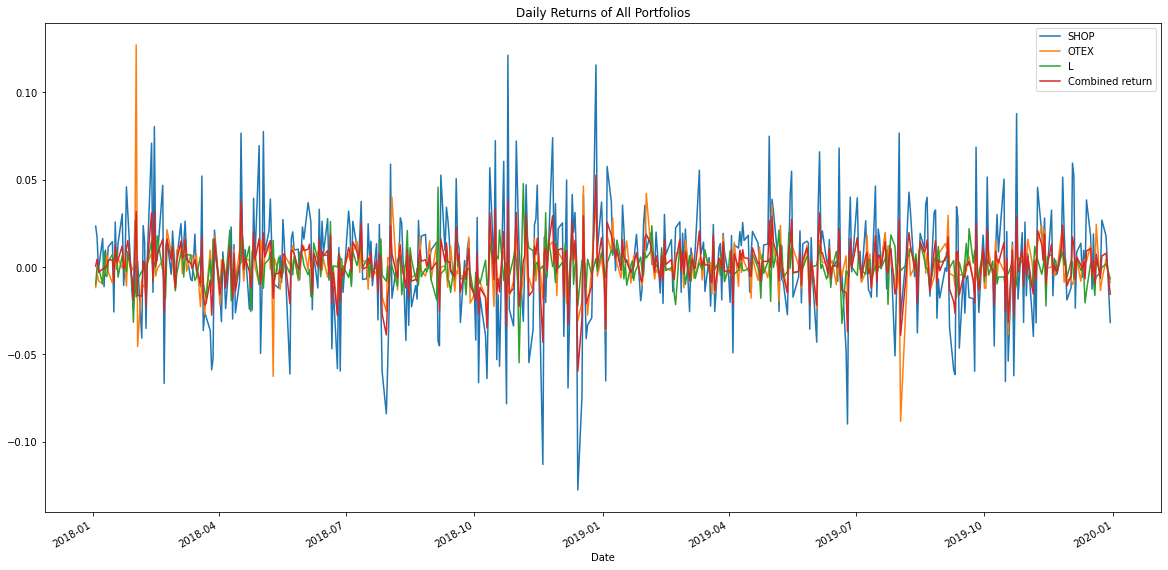

In [64]:
weighted_combo_cols.plot(figsize=(20,10), title="Daily Returns of All Portfolios")

<AxesSubplot:title={'center':'Cumulative Returns by stock'}, xlabel='Date'>

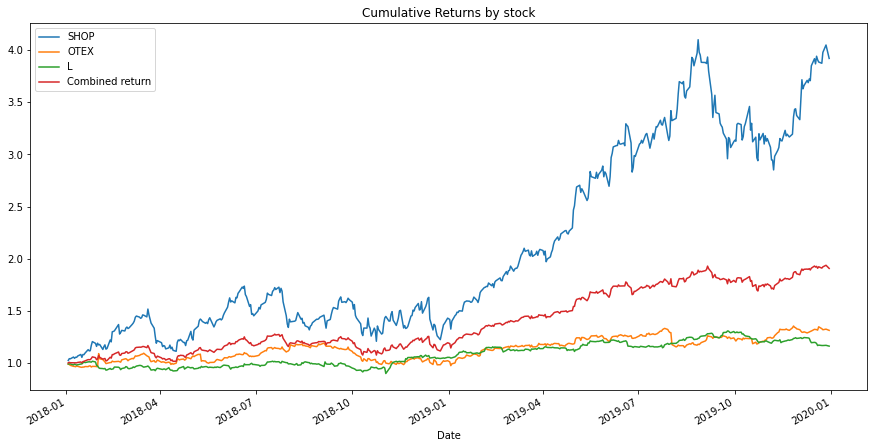

In [65]:
cumulative_returns = (1 + weighted_combo_cols).cumprod()
cumulative_returns.head()

cumulative_returns.plot(figsize=(15,7.5), title="Cumulative Returns by stock")

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [66]:
# Calculate the annualized `std`

# -> Firstly calc the daily std
weighted_daily_std = weighted_combo_cols.std()
weighted_daily_std.head(10)

SHOP               0.030786
OTEX               0.013552
L                  0.009598
Combined return    0.013520
dtype: float64

In [67]:
# -> Then annualise
weighted_annualized_std = weighted_daily_std * np.sqrt(252)
weighted_annualized_std.head(8)

SHOP               0.488717
OTEX               0.215132
L                  0.152369
Combined return    0.214626
dtype: float64

In [68]:
### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling Standard Deviation of Stocks (21 day window)'}, xlabel='Date'>

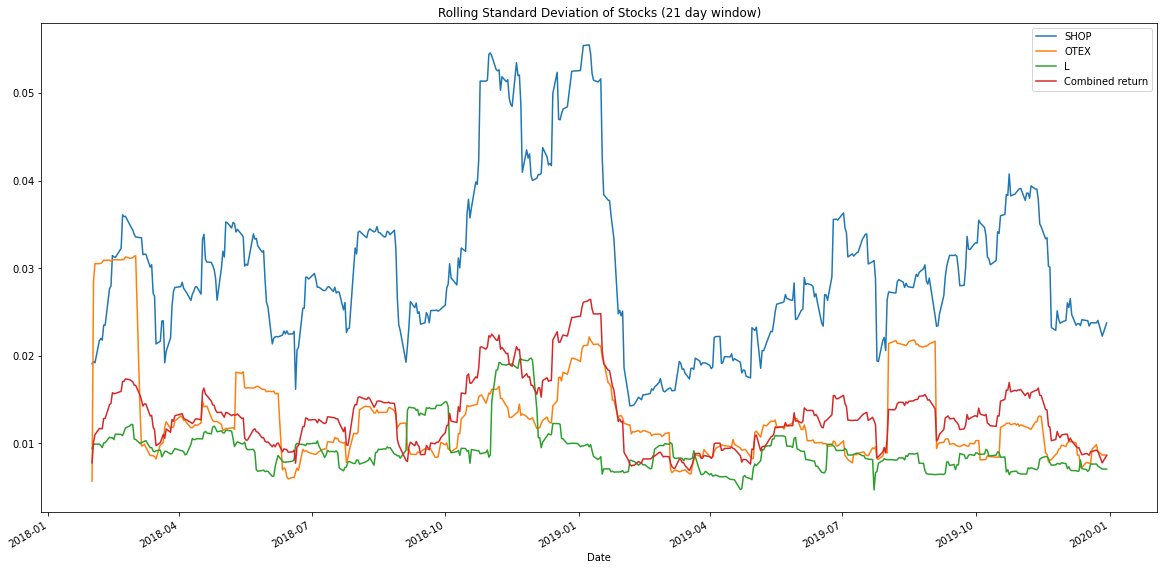

In [69]:
# Calculate rolling standard deviation

weighted_combo_cols.rolling(window=21).std()

# Plot rolling standard deviation

weighted_combo_cols.rolling(window=21).std().plot(figsize=(20,10), title="Rolling Standard Deviation of Stocks (21 day window)")

### Calculate and plot the correlation

Text(0.5, 1.0, 'Seaborn Heatmap of Stock correlations')

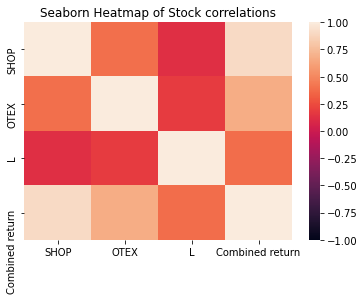

In [70]:
# Calculate and plot the correlation

correlation = weighted_combo_cols.corr()
correlation

# Display correlation matrix

import seaborn as sns
import matplotlib.pyplot as plt
ax = plt.axes()
sns.heatmap(correlation, vmin=-1, vmax=1, ax = ax)
ax.set_title('Seaborn Heatmap of Stock correlations')

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [71]:
# Calculate and plot Beta

variance = joined_data_cols['S&P TSX 60 Daily Returns'].var()
variance

# Calc covariance of my chosen portfolio to the S&P TSX 60

covariance = weighted_combo_cols['Combined return'].cov(joined_data_cols['S&P TSX 60 Daily Returns'])
covariance

# Computing beta

beta = covariance / variance
beta

# Displays the value of the beta

1.0385697437758354

In [72]:
# Add the S&P TSX 60 data to the portfolio weighted column returns data frame

comparison_combo_cols = pd.concat(
    [weighted_combo_cols, daily_returns], axis="columns", join="inner"
)
comparison_combo_cols.head()

,SHOP,OTEX,L,Combined return,S&P TSX 60 Daily Returns
Date,,,,,
2018-01-03,0.023398,-0.011703,-0.010002,0.000559,0.003774
2018-01-04,0.017092,-0.003715,0.000174,0.004472,0.002528
2018-01-05,-0.001455,-0.007924,0.000000,-0.003095,-0.003869
2018-01-08,0.016392,-0.009631,-0.009753,-0.000987,-0.001944
2018-01-09,-0.011254,-0.000712,0.008969,-0.000989,0.000097


In [73]:
# Rename the columns

columns = ["SHOP","OTEX","L", "Combined return","S&P TSX 60 Daily Returns"]
comparison_combo_cols.columns = columns
comparison_combo_cols

# Calculate covariance of all daily returns of Stocks poretfolio vs. S&P 60 TSX
covariance = comparison_combo_cols['Combined return'].cov(comparison_combo_cols['S&P TSX 60 Daily Returns'])
covariance

4.1829022531593055e-05

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [74]:
# Calculate Annualzied Sharpe Ratios

sharpe_ratios = ((comparison_combo_cols.mean()-comparison_combo_cols['S&P TSX 60 Daily Returns'].mean()) * 252) / (comparison_combo_cols.std() * np.sqrt(252))
sharpe_ratios

SHOP                        1.598352
OTEX                        0.613658
L                           0.386742
Combined return             1.493341
S&P TSX 60 Daily Returns    0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

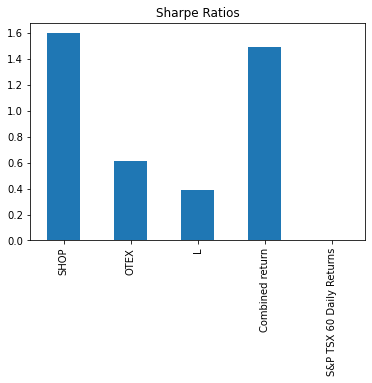

In [75]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

On the face of it with an even spread of weighting between Shopify, a booming e-commerce platform for online stores and retail point-of-sale systems, Otex, OpenText Corporation is a Canadian company that develops and sells enterprise information management software and Loblaws a traditional supermarket retailer spread across Canada, the cumulative returned a reasonable if unexciting return copmared to the S&P TSX 60, mainly due to the performace of Shopify which had a strong period of growth and returns over the analysed period. Shopify shows a high range of daily returns swings, compared to the steady returns of Otex in the more mainstream information software space, and Loblaws as you would expect from a traditional bricks and mortar retailer.

From a risk perspective the annualised volatility of SHOP at 0.49, is more than double that of OTEX 0.22, and three times that of Loblwas 0.15, bumping the combined return to 0.21. As expected from the strong returnms, the 60 day rolling standard deviation indcates a high level of volatility for Shopify compared to the other two stocks. As for the heatmap I have no idea what it is telling me other than if I look at the combined return column, it is most correlated to Loblaws, which makes sense. A beta that is greater than 1.0 indicates that the security's price, or in this case, a combined return is theoretically more volatile than the market, but only just at 1.03. Finally, the Sharpe Ratios combined returns is overinxed by the weight of  SHOP., and indicates a higher level of risk but chance for greater gains. Overall the portfolio seemed relatively balanced between the three stocks. 